# ***SHER DeepAI Research***

# **Loan Approval AI Model - Compression and Explanation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv("/content/loan_approval_dataset.csv")
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
498,499,3,Graduate,No,6700000,15500000,18,492,2100000,2000000,26300000,9400000,Rejected
2799,2800,4,Graduate,No,7500000,28700000,20,520,4600000,3500000,15200000,5700000,Rejected
1839,1840,2,Not Graduate,No,5300000,13100000,14,417,4900000,6200000,18200000,6800000,Rejected
2712,2713,0,Not Graduate,No,9500000,24800000,2,564,17400000,16000000,19600000,12000000,Approved
3991,3992,0,Graduate,No,3500000,7800000,14,366,6400000,3000000,13700000,4900000,Rejected


In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df[' education']

,education
0,Graduate
1,Not Graduate
2,Graduate
3,Graduate
4,Not Graduate
...,...
4264,Graduate
4265,Not Graduate
4266,Not Graduate
4267,Not Graduate


In [ ]:
df.rename(columns={' education': 'education'}, inplace=True)
# Now you can use df['education']
df.rename(columns={' self_employed': 'self_employed'}, inplace=True)
df.rename(columns={' loan_status': 'loan_status'}, inplace=True)

In [ ]:
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

In [ ]:
# encode eduction with number
df['education']=df['education'].map({'Graduate':1,'Not Graduate':0})

#encode self_employed with number
df['self_employed']=df['self_employed'].map({'Yes':1,'No':0})

#drop loan_id
df.drop('loan_id',axis=1,inplace=True)

#encode loan_status with number
df['loan_status']=df['loan_status'].map({'Approved':1,'Rejected':0})

In [ ]:
df.isna().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [ ]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [ ]:
# do the normalization on column except education, self_employed, and loan_status
df = (df - df.min()) / (df.max() - df.min())



In [ ]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1.0
1,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0.0
2,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0.0
3,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0.0
4,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,1.0,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0.0
4265,0.0,0.0,1.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1.0
4266,0.4,0.0,0.0,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,0.0
4267,0.2,0.0,0.0,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import tanh

num_features = x_train.shape[1]

model = Sequential()

model.add(Dense(64, input_shape=(num_features,)))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dense(128,))
model.add(Dropout(0.3))  # Prevent overfitting
model.add(Dense(64, ))
model.add(Dropout(0.2))
model.add(Dense(32, ))
model.add(Dropout(0.2))
model.add(Dense(16, activation=tanh))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,225 (79.00 KB)

 Trainable params: 20,097 (78.50 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
x_train, y_train = df.drop('loan_status', axis=1), df['loan_status']
# split dataset into 80% and 20% for train and val
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# train model
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5683 - loss: 0.7269 - val_accuracy: 0.8244 - val_loss: 0.5186
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7378 - loss: 0.5301 - val_accuracy: 0.8794 - val_loss: 0.3806
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7910 - loss: 0.4614 - val_accuracy: 0.8981 - val_loss: 0.3069
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8227 - loss: 0.4019 - val_accuracy: 0.9005 - val_loss: 0.2815
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8506 - loss: 0.3611 - val_accuracy: 0.9052 - val_loss: 0.2692
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8672 - loss: 0.3305 - val_accuracy: 0.9028 - val_loss: 0.2621
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8642 - loss: 0.3364 - val_accuracy: 0.9040 - val_loss: 0.2559
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8715 - loss: 0.3125 - val_accu

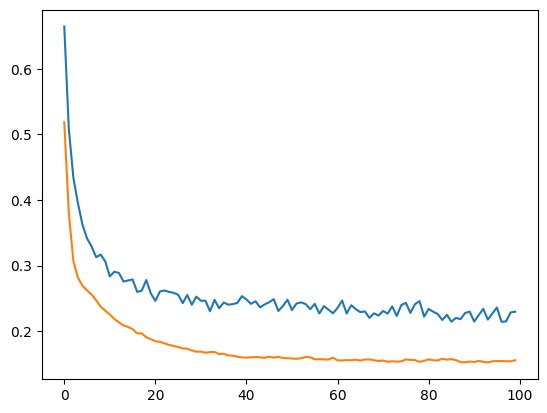

In [ ]:
# plot graph
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [ ]:
model.save("loan_approval.keras")

In [ ]:
from math import exp

In [ ]:
def equ(x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10):

  Zj = [1/(0.848335*exp(-0.44234961271286*(2.60722538794059*exp(-0.238767375187288*x0 + 0.0782986440848839*x1 - 0.158647814082574*x10 - 0.00941634461432718*x2 - 0.72242337988981*x3 + 0.575638280449166*x4 - 0.784981015967666*x5 + 0.995118274079437*x6 + 0.309319370209533*x7 - 0.259180576787394*x8 + 0.265356378173387*x9) - 0.383549502327409*exp(0.238767375187288*x0 - 0.0782986440848839*x1 + 0.158647814082574*x10 + 0.00941634461432718*x2 + 0.72242337988981*x3 - 0.575638280449166*x4 + 0.784981015967666*x5 - 0.995118274079437*x6 - 0.309319370209533*x7 + 0.259180576787394*x8 - 0.265356378173387*x9))/(2.60722538794059*exp(-0.238767375187288*x0 + 0.0782986440848839*x1 - 0.158647814082574*x10 - 0.00941634461432718*x2 - 0.72242337988981*x3 + 0.575638280449166*x4 - 0.784981015967666*x5 + 0.995118274079437*x6 + 0.309319370209533*x7 - 0.259180576787394*x8 + 0.265356378173387*x9) + 0.383549502327409*exp(0.238767375187288*x0 - 0.0782986440848839*x1 + 0.158647814082574*x10 + 0.00941634461432718*x2 + 0.72242337988981*x3 - 0.575638280449166*x4 + 0.784981015967666*x5 - 0.995118274079437*x6 - 0.309319370209533*x7 + 0.259180576787394*x8 - 0.265356378173387*x9)) - 0.393933355808258*(-0.371276485318219*exp(-0.113101438366702*x0 + 0.191389691720264*x1 - 0.111382289116592*x10 - 0.104537036705966*x2 + 0.715609611461103*x3 - 0.775605231068513*x4 + 0.578340069904531*x5 - 1.13982992119197*x6 + 0.175294818042882*x7 + 0.014432308847097*x8 - 0.17309994485867*x9) + 2.69341054320449*exp(0.113101438366702*x0 - 0.191389691720264*x1 + 0.111382289116592*x10 + 0.104537036705966*x2 - 0.715609611461103*x3 + 0.775605231068513*x4 - 0.578340069904531*x5 + 1.13982992119197*x6 - 0.175294818042882*x7 - 0.014432308847097*x8 + 0.17309994485867*x9))/(0.371276485318219*exp(-0.113101438366702*x0 + 0.191389691720264*x1 - 0.111382289116592*x10 - 0.104537036705966*x2 + 0.715609611461103*x3 - 0.775605231068513*x4 + 0.578340069904531*x5 - 1.13982992119197*x6 + 0.175294818042882*x7 + 0.014432308847097*x8 - 0.17309994485867*x9) + 2.69341054320449*exp(0.113101438366702*x0 - 0.191389691720264*x1 + 0.111382289116592*x10 + 0.104537036705966*x2 - 0.715609611461103*x3 + 0.775605231068513*x4 - 0.578340069904531*x5 + 1.13982992119197*x6 - 0.175294818042882*x7 - 0.014432308847097*x8 + 0.17309994485867*x9)) + 0.172757759690285*(-2.42634846622072*exp(-0.110634358488754*x0 + 0.0704809125515898*x1 - 0.0445656417224512*x10 + 0.00795053210586788*x2 - 0.858593974907521*x3 + 0.778489854423538*x4 - 0.68314521998632*x5 + 1.20299251458163*x6 + 0.0227677751328689*x7 + 0.0971665573914721*x8 + 0.149474788619548*x9) + 0.412141954843609*exp(0.110634358488754*x0 - 0.0704809125515898*x1 + 0.0445656417224512*x10 - 0.00795053210586788*x2 + 0.858593974907521*x3 - 0.778489854423538*x4 + 0.68314521998632*x5 - 1.20299251458163*x6 - 0.0227677751328689*x7 - 0.0971665573914721*x8 - 0.149474788619548*x9))/(2.42634846622072*exp(-0.110634358488754*x0 + 0.0704809125515898*x1 - 0.0445656417224512*x10 + 0.00795053210586788*x2 - 0.858593974907521*x3 + 0.778489854423538*x4 - 0.68314521998632*x5 + 1.20299251458163*x6 + 0.0227677751328689*x7 + 0.0971665573914721*x8 + 0.149474788619548*x9) + 0.412141954843609*exp(0.110634358488754*x0 - 0.0704809125515898*x1 + 0.0445656417224512*x10 - 0.00795053210586788*x2 + 0.858593974907521*x3 - 0.778489854423538*x4 + 0.68314521998632*x5 - 1.20299251458163*x6 - 0.0227677751328689*x7 - 0.0971665573914721*x8 - 0.149474788619548*x9)) + 0.326945215463638*(0.802223901222506*exp(-0.105418431707184*x0 - 0.0278954094667893*x1 - 0.0398895761598049*x10 + 0.0797380745451715*x2 - 0.0943850726366009*x3 + 0.338134477899023*x4 - 0.465613421795763*x5 - 2.6303360020421*x6 + 0.0315268587369369*x7 + 0.110439612041769*x8 - 0.0273942460439602*x9) - 1.24653478720355*exp(0.105418431707184*x0 + 0.0278954094667893*x1 + 0.0398895761598049*x10 - 0.0797380745451715*x2 + 0.0943850726366009*x3 - 0.338134477899023*x4 + 0.465613421795763*x5 + 2.6303360020421*x6 - 0.0315268587369369*x7 - 0.110439612041769*x8 + 0.0273942460439602*x9))/(0.802223901222506*exp(-0.105418431707184*x0 - 0.0278954094667893*x1 - 0.0398895761598049*x10 + 0.0797380745451715*x2 - 0.0943850726366009*x3 + 0.338134477899023*x4 - 0.465613421795763*x5 - 2.6303360020421*x6 + 0.0315268587369369*x7 + 0.110439612041769*x8 - 0.0273942460439602*x9) + 1.24653478720355*exp(0.105418431707184*x0 + 0.0278954094667893*x1 + 0.0398895761598049*x10 - 0.0797380745451715*x2 + 0.0943850726366009*x3 - 0.338134477899023*x4 + 0.465613421795763*x5 + 2.6303360020421*x6 - 0.0315268587369369*x7 - 0.110439612041769*x8 + 0.0273942460439602*x9)) - 0.433257699012756*(-0.408675972342785*exp(-0.0894646400166784*x0 + 0.0370605095656006*x1 - 0.131634675339125*x10 - 0.0869309703957081*x2 + 0.661152021682846*x3 - 0.402334193394999*x4 + 0.173410767415674*x5 - 2.81707466687012*x6 + 0.0563652195778333*x7 - 0.0830217384325103*x8 - 0.107731572658785*x9) + 2.4469263369397*exp(0.0894646400166784*x0 - 0.0370605095656006*x1 + 0.131634675339125*x10 + 0.0869309703957081*x2 - 0.661152021682846*x3 + 0.402334193394999*x4 - 0.173410767415674*x5 + 2.81707466687012*x6 - 0.0563652195778333*x7 + 0.0830217384325103*x8 + 0.107731572658785*x9))/(0.408675972342785*exp(-0.0894646400166784*x0 + 0.0370605095656006*x1 - 0.131634675339125*x10 - 0.0869309703957081*x2 + 0.661152021682846*x3 - 0.402334193394999*x4 + 0.173410767415674*x5 - 2.81707466687012*x6 + 0.0563652195778333*x7 - 0.0830217384325103*x8 - 0.107731572658785*x9) + 2.4469263369397*exp(0.0894646400166784*x0 - 0.0370605095656006*x1 + 0.131634675339125*x10 + 0.0869309703957081*x2 - 0.661152021682846*x3 + 0.402334193394999*x4 - 0.173410767415674*x5 + 2.81707466687012*x6 - 0.0563652195778333*x7 + 0.0830217384325103*x8 + 0.107731572658785*x9)) - 0.285370141267776*(2.51835336991457*exp(-0.0811112140886435*x0 + 0.0892135917996349*x1 + 0.0210676896477567*x10 - 0.0275978199368443*x2 - 0.661327860022618*x3 + 0.693464462256864*x4 - 0.580821193623011*x5 + 1.2492218751409*x6 + 0.0544914909785917*x7 + 0.0392854053409696*x8 - 0.0899169384833739*x9) - 0.397084861857144*exp(0.0811112140886435*x0 - 0.0892135917996349*x1 - 0.0210676896477567*x10 + 0.0275978199368443*x2 + 0.661327860022618*x3 - 0.693464462256864*x4 + 0.580821193623011*x5 - 1.2492218751409*x6 - 0.0544914909785917*x7 - 0.0392854053409696*x8 + 0.0899169384833739*x9))/(2.51835336991457*exp(-0.0811112140886435*x0 + 0.0892135917996349*x1 + 0.0210676896477567*x10 - 0.0275978199368443*x2 - 0.661327860022618*x3 + 0.693464462256864*x4 - 0.580821193623011*x5 + 1.2492218751409*x6 + 0.0544914909785917*x7 + 0.0392854053409696*x8 - 0.0899169384833739*x9) + 0.397084861857144*exp(0.0811112140886435*x0 - 0.0892135917996349*x1 - 0.0210676896477567*x10 + 0.0275978199368443*x2 + 0.661327860022618*x3 - 0.693464462256864*x4 + 0.580821193623011*x5 - 1.2492218751409*x6 - 0.0544914909785917*x7 - 0.0392854053409696*x8 + 0.0899169384833739*x9)) + 0.450325399637222*(0.867129157773475*exp(-0.078499705108315*x0 - 0.0402635921799017*x1 - 0.0112628726427869*x10 + 0.0209633196115125*x2 - 0.173567385498594*x3 + 0.315202381518773*x4 - 0.535478423599205*x5 - 2.84905321318571*x6 + 0.175706306831266*x7 + 0.0754294908808366*x8 - 0.00593920197164122*x9) - 1.15323073966017*exp(0.078499705108315*x0 + 0.0402635921799017*x1 + 0.0112628726427869*x10 - 0.0209633196115125*x2 + 0.173567385498594*x3 - 0.315202381518773*x4 + 0.535478423599205*x5 + 2.84905321318571*x6 - 0.175706306831266*x7 - 0.0754294908808366*x8 + 0.00593920197164122*x9))/(0.867129157773475*exp(-0.078499705108315*x0 - 0.0402635921799017*x1 - 0.0112628726427869*x10 + 0.0209633196115125*x2 - 0.173567385498594*x3 + 0.315202381518773*x4 - 0.535478423599205*x5 - 2.84905321318571*x6 + 0.175706306831266*x7 + 0.0754294908808366*x8 - 0.00593920197164122*x9) + 1.15323073966017*exp(0.078499705108315*x0 + 0.0402635921799017*x1 + 0.0112628726427869*x10 - 0.0209633196115125*x2 + 0.173567385498594*x3 - 0.315202381518773*x4 + 0.535478423599205*x5 + 2.84905321318571*x6 - 0.175706306831266*x7 - 0.0754294908808366*x8 + 0.00593920197164122*x9)) + 0.311438977718353*(0.493660816672793*exp(-0.0767634975058246*x0 - 0.0531882415385602*x1 + 0.0503906818825953*x10 + 0.0029308837383372*x2 + 0.472273047816815*x3 - 0.360369703991792*x4 + 0.199955569334943*x5 - 2.54174103922919*x6 + 0.0763207465265689*x7 + 0.0369560886373546*x8 - 0.0889191304837285*x9) - 2.02568234347596*exp(0.0767634975058246*x0 + 0.0531882415385602*x1 - 0.0503906818825953*x10 - 0.0029308837383372*x2 - 0.472273047816815*x3 + 0.360369703991792*x4 - 0.199955569334943*x5 + 2.54174103922919*x6 - 0.0763207465265689*x7 - 0.0369560886373546*x8 + 0.0889191304837285*x9))/(0.493660816672793*exp(-0.0767634975058246*x0 - 0.0531882415385602*x1 + 0.0503906818825953*x10 + 0.0029308837383372*x2 + 0.472273047816815*x3 - 0.360369703991792*x4 + 0.199955569334943*x5 - 2.54174103922919*x6 + 0.0763207465265689*x7 + 0.0369560886373546*x8 - 0.0889191304837285*x9) + 2.02568234347596*exp(0.0767634975058246*x0 + 0.0531882415385602*x1 - 0.0503906818825953*x10 - 0.0029308837383372*x2 - 0.472273047816815*x3 + 0.360369703991792*x4 - 0.199955569334943*x5 + 2.54174103922919*x6 - 0.0763207465265689*x7 - 0.0369560886373546*x8 + 0.0889191304837285*x9)) + 0.0930707082152367*(3.23875604077692*exp(-0.0723816830729508*x0 + 0.14344051318781*x1 - 0.152962037419341*x10 + 0.0442673683083725*x2 - 1.08738798762592*x3 + 0.633445324506493*x4 - 0.752864339675159*x5 + 3.64362952750566*x6 + 0.283839896933597*x7 + 0.190915352683005*x8 + 0.220708315129746*x9) - 0.308760520215075*exp(0.0723816830729508*x0 - 0.14344051318781*x1 + 0.152962037419341*x10 - 0.0442673683083725*x2 + 1.08738798762592*x3 - 0.633445324506493*x4 + 0.752864339675159*x5 - 3.64362952750566*x6 - 0.283839896933597*x7 - 0.190915352683005*x8 - 0.220708315129746*x9))/(3.23875604077692*exp(-0.0723816830729508*x0 + 0.14344051318781*x1 - 0.152962037419341*x10 + 0.0442673683083725*x2 - 1.08738798762592*x3 + 0.633445324506493*x4 - 0.752864339675159*x5 + 3.64362952750566*x6 + 0.283839896933597*x7 + 0.190915352683005*x8 + 0.220708315129746*x9) + 0.308760520215075*exp(0.0723816830729508*x0 - 0.14344051318781*x1 + 0.152962037419341*x10 - 0.0442673683083725*x2 + 1.08738798762592*x3 - 0.633445324506493*x4 + 0.752864339675159*x5 - 3.64362952750566*x6 - 0.283839896933597*x7 - 0.190915352683005*x8 - 0.220708315129746*x9)) + 0.0576214604079723*(0.839715825772488*exp(-0.0620816215360982*x0 - 0.0956062173082457*x1 - 0.0263485511189607*x10 + 0.008250372005283*x2 - 0.0825509406611749*x3 - 0.0544368858330837*x4 + 0.102044940202893*x5 - 0.252477911520441*x6 - 0.0342012308198018*x7 - 0.0211473517261836*x8 - 0.0184350304204635*x9) - 1.19087906802288*exp(0.0620816215360982*x0 + 0.0956062173082457*x1 + 0.0263485511189607*x10 - 0.008250372005283*x2 + 0.0825509406611749*x3 + 0.0544368858330837*x4 - 0.102044940202893*x5 + 0.252477911520441*x6 + 0.0342012308198018*x7 + 0.0211473517261836*x8 + 0.0184350304204635*x9))/(0.839715825772488*exp(-0.0620816215360982*x0 - 0.0956062173082457*x1 - 0.0263485511189607*x10 + 0.008250372005283*x2 - 0.0825509406611749*x3 - 0.0544368858330837*x4 + 0.102044940202893*x5 - 0.252477911520441*x6 - 0.0342012308198018*x7 - 0.0211473517261836*x8 - 0.0184350304204635*x9) + 1.19087906802288*exp(0.0620816215360982*x0 + 0.0956062173082457*x1 + 0.0263485511189607*x10 - 0.008250372005283*x2 + 0.0825509406611749*x3 + 0.0544368858330837*x4 - 0.102044940202893*x5 + 0.252477911520441*x6 + 0.0342012308198018*x7 + 0.0211473517261836*x8 + 0.0184350304204635*x9)) + 0.426563084125519*(0.859842956490939*exp(-0.0615382936026315*x0 - 0.0169420489613192*x1 - 0.0277713999741147*x10 + 0.0690395891545985*x2 - 0.133874742126459*x3 + 0.313101514661807*x4 - 0.674493583797839*x5 - 3.38744714861619*x6 + 0.107762605869433*x7 - 0.019499286012775*x8 + 0.0309981230871555*x9) - 1.16300307219012*exp(0.0615382936026315*x0 + 0.0169420489613192*x1 + 0.0277713999741147*x10 - 0.0690395891545985*x2 + 0.133874742126459*x3 - 0.313101514661807*x4 + 0.674493583797839*x5 + 3.38744714861619*x6 - 0.107762605869433*x7 + 0.019499286012775*x8 - 0.0309981230871555*x9))/(0.859842956490939*exp(-0.0615382936026315*x0 - 0.0169420489613192*x1 - 0.0277713999741147*x10 + 0.0690395891545985*x2 - 0.133874742126459*x3 + 0.313101514661807*x4 - 0.674493583797839*x5 - 3.38744714861619*x6 + 0.107762605869433*x7 - 0.019499286012775*x8 + 0.0309981230871555*x9) + 1.16300307219012*exp(0.0615382936026315*x0 + 0.0169420489613192*x1 + 0.0277713999741147*x10 - 0.0690395891545985*x2 + 0.133874742126459*x3 - 0.313101514661807*x4 + 0.674493583797839*x5 + 3.38744714861619*x6 - 0.107762605869433*x7 + 0.019499286012775*x8 - 0.0309981230871555*x9)) - 0.247303873300552*(2.2327442092082*exp(-0.060678305318698*x0 + 0.0266001958980073*x1 - 0.19817955318378*x10 + 0.0257232933780477*x2 - 0.619964822575061*x3 + 0.626692602917802*x4 - 0.653726018989841*x5 + 1.08323094341802*x6 + 0.406876934015818*x7 + 0.0775831619689251*x8 - 0.022347765983498*x9) - 0.447879338741911*exp(0.060678305318698*x0 - 0.0266001958980073*x1 + 0.19817955318378*x10 - 0.0257232933780477*x2 + 0.619964822575061*x3 - 0.626692602917802*x4 + 0.653726018989841*x5 - 1.08323094341802*x6 - 0.406876934015818*x7 - 0.0775831619689251*x8 + 0.022347765983498*x9))/(2.2327442092082*exp(-0.060678305318698*x0 + 0.0266001958980073*x1 - 0.19817955318378*x10 + 0.0257232933780477*x2 - 0.619964822575061*x3 + 0.626692602917802*x4 - 0.653726018989841*x5 + 1.08323094341802*x6 + 0.406876934015818*x7 + 0.0775831619689251*x8 - 0.022347765983498*x9) + 0.447879338741911*exp(0.060678305318698*x0 - 0.0266001958980073*x1 + 0.19817955318378*x10 - 0.0257232933780477*x2 + 0.619964822575061*x3 - 0.626692602917802*x4 + 0.653726018989841*x5 - 1.08323094341802*x6 - 0.406876934015818*x7 - 0.0775831619689251*x8 + 0.022347765983498*x9)) - 0.394525974988937*(2.84041498490785*exp(-0.042956858225923*x0 + 0.153206369531753*x1 - 0.0683518713249408*x10 + 0.00229290051091222*x2 - 0.947100850588587*x3 + 0.718277671739369*x4 - 0.817619130250704*x5 + 1.29426163454591*x6 + 0.192616746354472*x7 + 0.211497177590629*x8 + 0.207403876721817*x9) - 0.352061232359835*exp(0.042956858225923*x0 - 0.153206369531753*x1 + 0.0683518713249408*x10 - 0.00229290051091222*x2 + 0.947100850588587*x3 - 0.718277671739369*x4 + 0.817619130250704*x5 - 1.29426163454591*x6 - 0.192616746354472*x7 - 0.211497177590629*x8 - 0.207403876721817*x9))/(2.84041498490785*exp(-0.042956858225923*x0 + 0.153206369531753*x1 - 0.0683518713249408*x10 + 0.00229290051091222*x2 - 0.947100850588587*x3 + 0.718277671739369*x4 - 0.817619130250704*x5 + 1.29426163454591*x6 + 0.192616746354472*x7 + 0.211497177590629*x8 + 0.207403876721817*x9) + 0.352061232359835*exp(0.042956858225923*x0 - 0.153206369531753*x1 + 0.0683518713249408*x10 - 0.00229290051091222*x2 + 0.947100850588587*x3 - 0.718277671739369*x4 + 0.817619130250704*x5 - 1.29426163454591*x6 - 0.192616746354472*x7 - 0.211497177590629*x8 - 0.207403876721817*x9)) - 0.264601975679398*(-0.740927252908388*exp(-0.0413791501710174*x0 - 0.0300979324785726*x1 + 0.00333001856956004*x10 + 0.031599980248749*x2 - 0.0326459425247714*x3 - 0.0872271933511931*x4 - 0.250777700778528*x5 - 2.56279017997409*x6 + 0.051982106500549*x7 + 0.121424028679663*x8 + 0.0705655499590415*x9) + 1.34966016714146*exp(0.0413791501710174*x0 + 0.0300979324785726*x1 - 0.00333001856956004*x10 - 0.031599980248749*x2 + 0.0326459425247714*x3 + 0.0872271933511931*x4 + 0.250777700778528*x5 + 2.56279017997409*x6 - 0.051982106500549*x7 - 0.121424028679663*x8 - 0.0705655499590415*x9))/(0.740927252908388*exp(-0.0413791501710174*x0 - 0.0300979324785726*x1 + 0.00333001856956004*x10 + 0.031599980248749*x2 - 0.0326459425247714*x3 - 0.0872271933511931*x4 - 0.250777700778528*x5 - 2.56279017997409*x6 + 0.051982106500549*x7 + 0.121424028679663*x8 + 0.0705655499590415*x9) + 1.34966016714146*exp(0.0413791501710174*x0 + 0.0300979324785726*x1 - 0.00333001856956004*x10 - 0.031599980248749*x2 + 0.0326459425247714*x3 + 0.0872271933511931*x4 + 0.250777700778528*x5 + 2.56279017997409*x6 - 0.051982106500549*x7 - 0.121424028679663*x8 - 0.0705655499590415*x9)) + 0.476659685373306*(-1.91180188127448*exp(-0.0282468599329329*x0 + 0.139262348349997*x1 + 0.115228063565062*x10 - 0.0943619736081855*x2 - 0.399746874838527*x3 + 0.272434536225959*x4 + 0.245261341436585*x5 + 3.84829573379278*x6 - 0.149171059405459*x7 - 0.050145722053769*x8 + 0.0819550489184607*x9) + 0.523066751735468*exp(0.0282468599329329*x0 - 0.139262348349997*x1 - 0.115228063565062*x10 + 0.0943619736081855*x2 + 0.399746874838527*x3 - 0.272434536225959*x4 - 0.245261341436585*x5 - 3.84829573379278*x6 + 0.149171059405459*x7 + 0.050145722053769*x8 - 0.0819550489184607*x9))/(1.91180188127448*exp(-0.0282468599329329*x0 + 0.139262348349997*x1 + 0.115228063565062*x10 - 0.0943619736081855*x2 - 0.399746874838527*x3 + 0.272434536225959*x4 + 0.245261341436585*x5 + 3.84829573379278*x6 - 0.149171059405459*x7 - 0.050145722053769*x8 + 0.0819550489184607*x9) + 0.523066751735468*exp(0.0282468599329329*x0 - 0.139262348349997*x1 - 0.115228063565062*x10 + 0.0943619736081855*x2 + 0.399746874838527*x3 - 0.272434536225959*x4 - 0.245261341436585*x5 - 3.84829573379278*x6 + 0.149171059405459*x7 + 0.050145722053769*x8 - 0.0819550489184607*x9)) - 0.0573341250419617*(1.6603725173372*exp(-0.00405447362122578*x0 + 0.00419719293940304*x1 + 0.157389504888649*x10 - 0.00295621696747287*x2 - 0.635340262498866*x3 + 0.616851150076067*x4 - 0.272260648313711*x5 + 0.936700491199927*x6 - 0.216361854752648*x7 - 0.0365277988374358*x8 + 0.158786960480699*x9) - 0.602274483321211*exp(0.00405447362122578*x0 - 0.00419719293940304*x1 - 0.157389504888649*x10 + 0.00295621696747287*x2 + 0.635340262498866*x3 - 0.616851150076067*x4 + 0.272260648313711*x5 - 0.936700491199927*x6 + 0.216361854752648*x7 + 0.0365277988374358*x8 - 0.158786960480699*x9))/(1.6603725173372*exp(-0.00405447362122578*x0 + 0.00419719293940304*x1 + 0.157389504888649*x10 - 0.00295621696747287*x2 - 0.635340262498866*x3 + 0.616851150076067*x4 - 0.272260648313711*x5 + 0.936700491199927*x6 - 0.216361854752648*x7 - 0.0365277988374358*x8 + 0.158786960480699*x9) + 0.602274483321211*exp(0.00405447362122578*x0 - 0.00419719293940304*x1 - 0.157389504888649*x10 + 0.00295621696747287*x2 + 0.635340262498866*x3 - 0.616851150076067*x4 + 0.272260648313711*x5 - 0.936700491199927*x6 + 0.216361854752648*x7 + 0.0365277988374358*x8 - 0.158786960480699*x9))) + 1)]

  with open('loan_approval_equ.txt', 'a') as f:
    f.write(str(Zj))
  return Zj


In [ ]:
x_new = [0.4,	1.0,	0.0,	0.969072,	0.755102,	0.555556,	0.796667,	0.085616,	0.907216,	0.575835,	0.544218]

In [ ]:
x = np.array(x_new, dtype=np.float64)

In [ ]:
# reshpae
x = x.reshape(1, -1)

In [ ]:
equ(0.4,	1.0,	0.0,	0.969072,	0.755102,	0.555556,	0.796667,	0.085616,	0.907216,	0.575835,	0.544218)

[0.9886575248580572]

In [ ]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.9917382]], dtype=float32)

In [ ]:
import psutil

# ... before prediction ...
process = psutil.Process()
cpu_percent_before = process.cpu_percent()
memory_info_before = process.memory_info()

model.predict(x)

# ... after prediction ...
cpu_percent_after = process.cpu_percent()
memory_info_after = process.memory_info()

print(f"CPU usage: {cpu_percent_after - cpu_percent_before}%")
print(f"Memory usage: {memory_info_after.rss - memory_info_before.rss} bytes") # rss = Resident Set Size

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
CPU usage: 79.9%
Memory usage: 12288 bytes


In [ ]:
import psutil

# ... before prediction ...
process = psutil.Process()
cpu_percent_before = process.cpu_percent()
memory_info_before = process.memory_info()

equ(0.4,	1.0,	0.0,	0.969072,	0.755102,	0.555556,	0.796667,	0.085616,	0.907216,	0.575835,	0.544218)

# ... after prediction ...
cpu_percent_after = process.cpu_percent()
memory_info_after = process.memory_info()

print(f"CPU usage: {cpu_percent_after - cpu_percent_before}%")
print(f"Memory usage: {memory_info_after.rss - memory_info_before.rss} bytes") # rss = Resident Set Size

CPU usage: 0.0%
Memory usage: 0 bytes


In [ ]:
import psutil
import time

# Capture CPU and memory before prediction
cpu_before = psutil.cpu_percent(interval=1)
memory_before = psutil.virtual_memory().used  # Memory in bytes

start_time = time.time()
predictions = model.predict(x)
end_time = time.time()

# Capture CPU and memory after prediction
cpu_after = psutil.cpu_percent(interval=1)
memory_after = psutil.virtual_memory().used  # Memory in bytes

print(f"Prediction Time: {end_time - start_time:.6f} seconds")
print(f"CPU Usage Before: {cpu_before:.2f}% | After: {cpu_after:.2f}%")
print(f"Memory Usage Before: {memory_before} bytes | After: {memory_after} bytes")
print(f"Memory Used: {memory_after - memory_before} bytes")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction Time: 0.094750 seconds
CPU Usage Before: 1.50% | After: 2.00%
Memory Usage Before: 1242591232 bytes | After: 1242591232 bytes
Memory Used: 0 bytes


In [ ]:
import psutil
import time

# Capture CPU and memory before prediction
cpu_before = psutil.cpu_percent(interval=1)
memory_before = psutil.virtual_memory().used  # Memory in bytes

start_time = time.time()
predictions = equ(0.4,	1.0,	0.0,	0.969072,	0.755102,	0.555556,	0.796667,	0.085616,	0.907216,	0.575835,	0.544218)

end_time = time.time()

# Capture CPU and memory after prediction
cpu_after = psutil.cpu_percent(interval=1)
memory_after = psutil.virtual_memory().used  # Memory in bytes

print(f"Prediction Time: {end_time - start_time:.6f} seconds")
print(f"CPU Usage Before: {cpu_before:.2f}% | After: {cpu_after:.2f}%")
print(f"Memory Usage Before: {memory_before} bytes | After: {memory_after} bytes")
print(f"Memory Used: {memory_after - memory_before} bytes")


Prediction Time: 0.000271 seconds
CPU Usage Before: 2.50% | After: 35.30%
Memory Usage Before: 1242435584 bytes | After: 1252495360 bytes
Memory Used: 10059776 bytes
